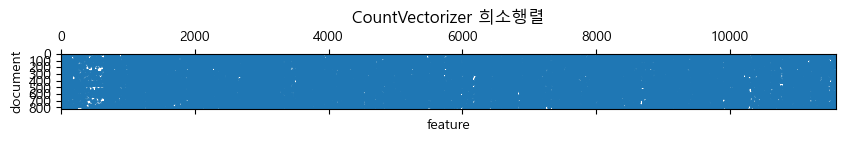

In [9]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

plt.style.use('default')

# 폰트 설정
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 데이터 불러오기
os.chdir('C:/Users/USER/Desktop/핵심역량 프로젝트/데이터/라벨링 데이터')

data = pd.read_csv('0727_masking_labeling_data.csv')

selected_columns1 = ['text_morphed', 'title_morphed', 'aggr', '욕설_모욕', '비꼼_시비', '성희롱', '요지불명', '저격성 민원']
data1 = data[selected_columns1][data.aggr == 0]
data2 = data[selected_columns1][data.aggr == 1]
data1 = data1[300:812]
data2 = data2

data3 = pd.concat([data1, data2])

# 텍스트와 라벨 분리
data_contents = data3['text_morphed'] + ' ' + data3['title_morphed']
data_labeling = data3['aggr']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data_contents, data_labeling, stratify=data_labeling, test_size=0.2, random_state=42)

# CountVectorizer를 사용하여 변환
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)

# 희소 행렬 시각화
plt.figure(figsize=(10, 8))
plt.spy(X_train_count, markersize=1)
plt.title('CountVectorizer 희소행렬')
plt.xlabel('feature')
plt.ylabel('document')
plt.show()


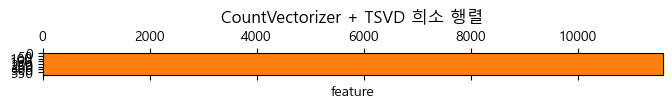

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
# TF-IDF 벡터화
vectorizer = CountVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

# TSVD 적용
n_components = 400  # 원하는 차원 수를 지정
tsvd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_tsvd = tsvd.fit_transform(X_train_tfidf)

# TSVD 결과를 희소 행렬로 변환
X_train_tsvd_sparse = tsvd.components_

# 희소 행렬 시각화
plt.figure(figsize=(8, 8))  # 정사각형 박스 설정
plt.spy(X_train_tsvd_sparse, markersize=1,color = 'tab:orange')
plt.title('CountVectorizer + TSVD 희소 행렬')
plt.xlabel('feature')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


Training extra_trees with no_tsvd...
extra_trees Train set score: 0.9988
extra_trees Test set score: 0.8293
extra_trees Cross-validation mean score: 0.8290

Training ridge_classifier with no_tsvd...
ridge_classifier Train set score: 0.9988
ridge_classifier Test set score: 0.8000
ridge_classifier Cross-validation mean score: 0.7888

Training logistic_regression with no_tsvd...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

logistic_regression Train set score: 0.9988
logistic_regression Test set score: 0.8732
logistic_regression Cross-validation mean score: 0.8547

Training svm with no_tsvd...
svm Train set score: 0.9365
svm Test set score: 0.8146
svm Cross-validation mean score: 0.8131

Training hard_model with no_tsvd...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

hard_model Train set score: 0.9988
hard_model Test set score: 0.8634
hard_model Cross-validation mean score: 0.8376

Training soft_model with no_tsvd...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

soft_model Train set score: 0.9988
soft_model Test set score: 0.8341
soft_model Cross-validation mean score: 0.8547

Training extra_trees with tsvd...
extra_trees Train set score: 0.9988
extra_trees Test set score: 0.7756
extra_trees Cross-validation mean score: 0.7216

Training ridge_classifier with tsvd...
ridge_classifier Train set score: 0.9402
ridge_classifier Test set score: 0.8195
ridge_classifier Cross-validation mean score: 0.8095

Training logistic_regression with tsvd...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

logistic_regression Train set score: 0.9939
logistic_regression Test set score: 0.8683
logistic_regression Cross-validation mean score: 0.8461

Training svm with tsvd...
svm Train set score: 0.9194
svm Test set score: 0.8146
svm Cross-validation mean score: 0.8131

Training hard_model with tsvd...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

hard_model Train set score: 0.9597
hard_model Test set score: 0.8293
hard_model Cross-validation mean score: 0.8021

Training soft_model with tsvd...


c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

soft_model Train set score: 0.9951
soft_model Test set score: 0.8537
soft_model Cross-validation mean score: 0.8412



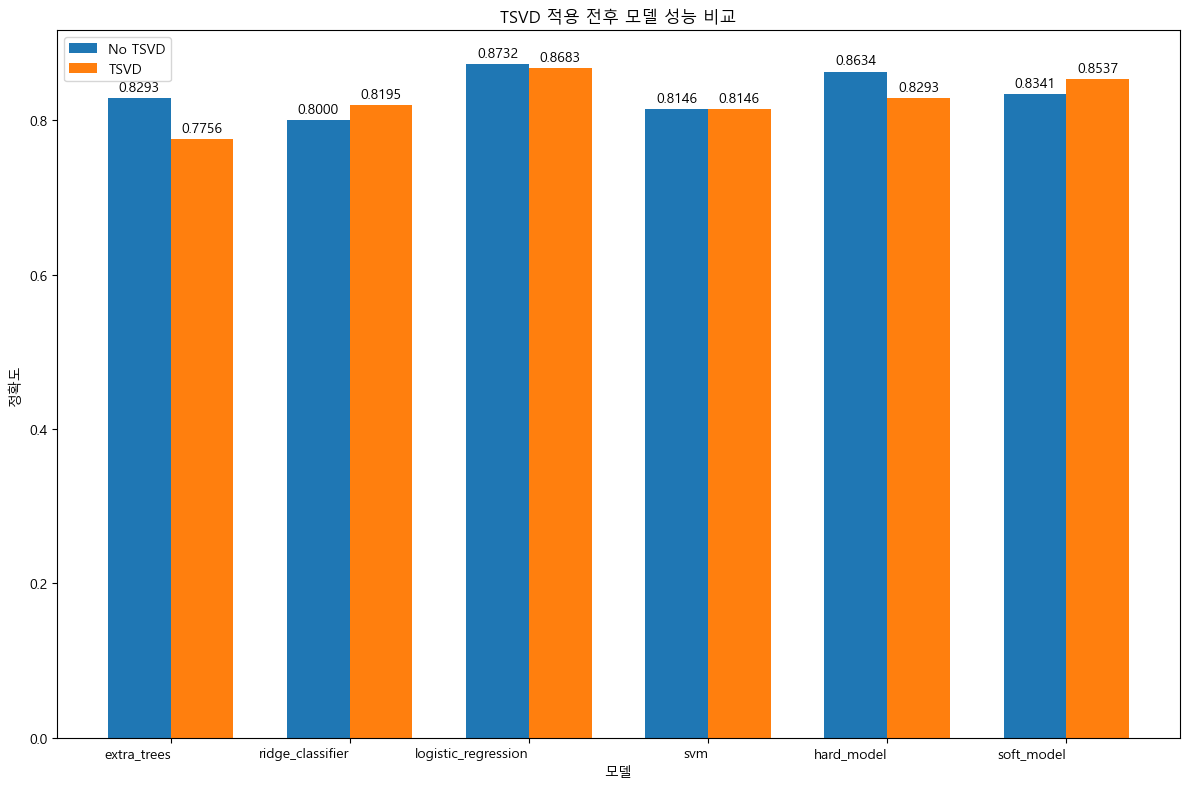

In [12]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer  # 변경된 부분
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
import joblib
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
data_path = 'C:/Users/USER/Desktop/핵심역량 프로젝트/데이터/라벨링 데이터/0727_masking_labeling_data.csv'
data = pd.read_csv(data_path)

selected_columns = ['text_morphed', 'title_morphed', 'aggr']
data = data[selected_columns]

# 데이터 필터링
data1 = data[data['aggr'] == 0].iloc[300:812]
data2 = data[data['aggr'] == 1]
data3 = pd.concat([data1, data2])

# 텍스트와 라벨 분리
data_contents = data3['text_morphed'] + ' ' + data3['title_morphed']
data_labeling = data3['aggr']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data_contents, data_labeling, stratify=data_labeling, test_size=0.2, random_state=42)

# CountVectorizer를 사용하는 파이프라인 정의
def create_pipelines(apply_tsvd=False):
    pipelines = {}

    tsvd = TruncatedSVD(n_components=400, random_state=42) if apply_tsvd else None

    for name, model in [
        ('extra_trees', ExtraTreesClassifier()),
        ('ridge_classifier', RidgeClassifier()),
        ('logistic_regression', LogisticRegression()),
        ('svm', SVC(probability=True)),
        ('hard_model', VotingClassifier([
            ('LR', LogisticRegression()), 
            ('ridge', RidgeClassifier()), 
            ('svm', SVC()), 
            ('et', ExtraTreesClassifier())], voting='hard')),
        ('soft_model', VotingClassifier([
            ('LR', LogisticRegression()), 
            ('svm', SVC(probability=True)), 
            ('et', ExtraTreesClassifier())], voting='soft'))
    ]:
        steps = [('vect', CountVectorizer())]  # 변경된 부분
        if tsvd:
            steps.append(('tsvd', tsvd))
        steps.append((name, model))
        pipelines[name] = Pipeline(steps)
    
    return pipelines

# 두 가지 파이프라인 세트 생성
pipelines_no_tsvd = create_pipelines(apply_tsvd=False)
pipelines_tsvd = create_pipelines(apply_tsvd=True)

# 모델 훈련 및 평가
results = {'no_tsvd': {}, 'tsvd': {}}

def train_and_evaluate(pipelines, key):
    for model_name, pipeline in pipelines.items():
        print(f"Training {model_name} with {key}...")

        # 모델 훈련
        pipeline.fit(X_train, y_train)
        
        # 교차검증 점수 계산
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
        
        # 성능 출력 및 저장
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        results[key][model_name] = {
            'train_score': train_score,
            'test_score': test_score,
            'cv_scores': cv_scores,
            'cv_mean': cv_scores.mean()
        }

        print(f"{model_name} Train set score: {train_score:.4f}")
        print(f"{model_name} Test set score: {test_score:.4f}")
        print(f"{model_name} Cross-validation mean score: {cv_scores.mean():.4f}\n")

        # 모델 저장
        model_save_path = os.path.join(f'C:/Users/USER/Desktop/핵심역량 프로젝트/데이터/모델/0727_aggr_{model_name}_countvec_{"tsvd_" if key == "tsvd" else ""}nonemasking_model.pkl')
        joblib.dump(pipeline, model_save_path)

train_and_evaluate(pipelines_no_tsvd, 'no_tsvd')
train_and_evaluate(pipelines_tsvd, 'tsvd')

# 성능 비교 시각화
def plot_performance_comparison(results):
    model_names = list(results['no_tsvd'].keys())
    no_tsvd_scores = [results['no_tsvd'][name]['test_score'] for name in model_names]
    tsvd_scores = [results['tsvd'][name]['test_score'] for name in model_names]

    x = np.arange(len(model_names))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 8))
    bars1 = ax.bar(x - width/2, no_tsvd_scores, width, label='No TSVD')
    bars2 = ax.bar(x + width/2, tsvd_scores, width, label='TSVD')

    ax.set_xlabel('모델')
    ax.set_ylabel('정확도')
    ax.set_title('TSVD 적용 전후 모델 성능 비교')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=0, ha='right')
    ax.legend()

    for bars in [bars1, bars2]:
        ax.bar_label(bars, fmt='%.4f', padding=3)

    plt.tight_layout()
    plt.show()

plot_performance_comparison(results)

